# Data Analytics of NIJ data

- source: [NIJ's Recidivism Challenge Full Dataset](https://data.ojp.usdoj.gov/Courts/NIJ-s-Recidivism-Challenge-Full-Dataset/ynf5-u8nk/about_data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True


In [2]:
fs = pd.ExcelFile("./nij-challenge.xlsx", engine="openpyxl")
df = fs.parse("data")

# Overall statistics

In [3]:
prior_arrest_cols = [col for col in df.columns if col.startswith("Prior_Conviction")]
prior_arrest_cols

['Prior_Conviction_Episodes_Felony',
 'Prior_Conviction_Episodes_Misd',
 'Prior_Conviction_Episodes_Viol',
 'Prior_Conviction_Episodes_Prop',
 'Prior_Conviction_Episodes_Drug',
 'Prior_Conviction_Episodes_PPViolationCharges',
 'Prior_Conviction_Episodes_DomesticViolenceCharges',
 'Prior_Conviction_Episodes_GunCharges']

<Axes: >

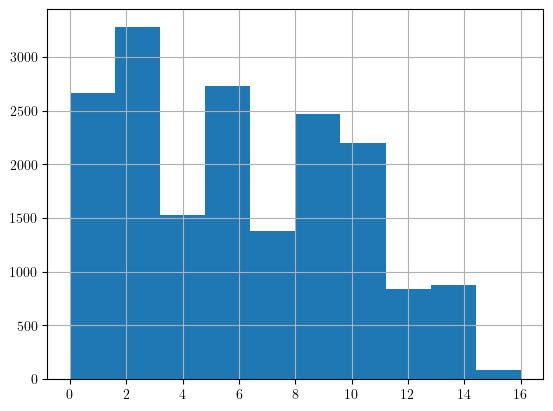

In [4]:
df['N'] = df[prior_arrest_cols].astype(int).sum(axis=1)
df["N"].hist()

In [5]:
df

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,N
0,1,M,BLACK,43-47,16,0.0,3.0,Standard,At least some college,3,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,10
1,2,M,BLACK,33-37,16,0.0,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,13
2,3,M,BLACK,48 or older,24,0.0,7.0,High,At least some college,3,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,10
3,4,M,WHITE,38-42,16,0.0,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,12
4,5,M,WHITE,33-37,16,0.0,4.0,Specialized,Less than HS diploma,3,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18023,26756,M,BLACK,23-27,9,0.0,5.0,Standard,At least some college,1,...,0.000000,0.0,0.189507,0.572044,False,True,True,False,False,4
18024,26758,M,WHITE,38-42,25,0.0,5.0,Standard,At least some college,3,...,0.000000,0.0,0.757098,0.576104,False,True,False,True,False,2
18025,26759,M,BLACK,33-37,15,0.0,5.0,Standard,At least some college,3,...,NaN,NaN,0.711138,0.894125,False,True,False,True,False,0
18026,26760,F,WHITE,33-37,15,NaN,5.0,Standard,At least some college,3,...,0.000000,0.0,0.000000,0.000000,True,False,False,False,False,0


In [6]:
dfs = (
    df.groupby("N")
    .agg(
        {
            "Recidivism_Arrest_Year1": "sum",
            "Recidivism_Arrest_Year2": "sum",
            "Recidivism_Arrest_Year3": "sum",
            "ID": "count",
        }
    )
    .assign(
        rate1=lambda x: x["Recidivism_Arrest_Year1"] / x["ID"],
        rate2=lambda x: (x["Recidivism_Arrest_Year1"] + x["Recidivism_Arrest_Year2"])
        / x["ID"],
        rate3=lambda x: (
            x["Recidivism_Arrest_Year1"]
            + x["Recidivism_Arrest_Year2"]
            + x["Recidivism_Arrest_Year3"]
        )
        / x["ID"],
    )
    .reset_index()
)
dfs

,N,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,ID,rate1,rate2,rate3
0,0,261,198,113,1382,0.188857,0.332127,0.413893
1,1,254,194,105,1278,0.198748,0.350548,0.432707
2,2,430,300,162,1849,0.232558,0.394808,0.482423
3,3,376,236,135,1429,0.263121,0.428272,0.522743
4,4,422,305,142,1530,0.275817,0.475163,0.567974
5,5,401,219,163,1358,0.295287,0.456554,0.576583
6,6,420,260,125,1368,0.307018,0.497076,0.588450
7,7,454,247,148,1377,0.329702,0.509078,0.616558
8,8,449,239,125,1294,0.346986,0.531685,0.628284
9,9,417,236,126,1170,0.356410,0.558120,0.665812


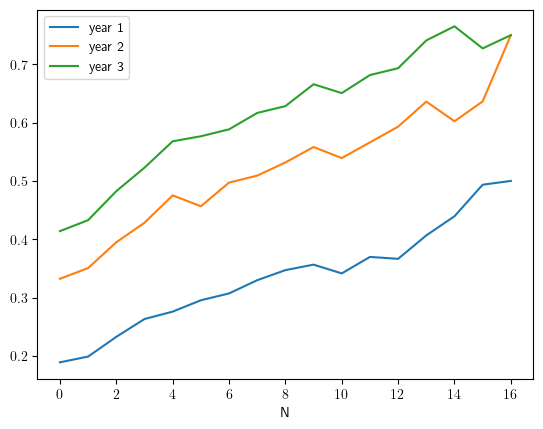

In [7]:
fig = plt.plot(dfs["N"], dfs["rate1"], label='year 1')
plt.plot(dfs["N"], dfs["rate2"], label='year 2')
plt.plot(dfs["N"], dfs["rate3"], label='year 3')
plt.xlabel("N")
plt.legend()

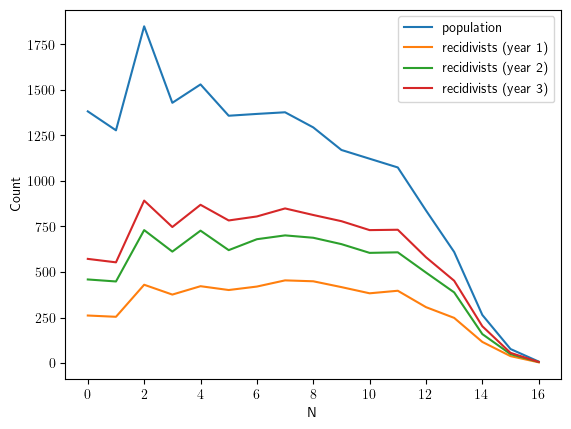

In [8]:
fig2 = plt.plot(dfs["N"], dfs["ID"], label="population")
plt.plot(dfs["N"], dfs["Recidivism_Arrest_Year1"], label="recidivists (year 1)")
plt.plot(
    dfs["N"],
    dfs["Recidivism_Arrest_Year1"] + dfs["Recidivism_Arrest_Year2"],
    label="recidivists (year 2)",
)
plt.plot(
    dfs["N"],
    dfs["Recidivism_Arrest_Year1"]
    + dfs["Recidivism_Arrest_Year2"]
    + dfs["Recidivism_Arrest_Year3"],
    label="recidivists (year 3)",
)
plt.legend()
plt.xlabel("N")
plt.ylabel("Count")
plt.savefig("nij-recidivism.png", dpi=500)

In [9]:
dfs["Recidivism_Arrest_Year1"].values

array([261, 254, 430, 376, 422, 401, 420, 454, 449, 417, 383, 397, 307,
       248, 116,  38,   4])

# Risk Groups

Find multiple subpopulations in the group

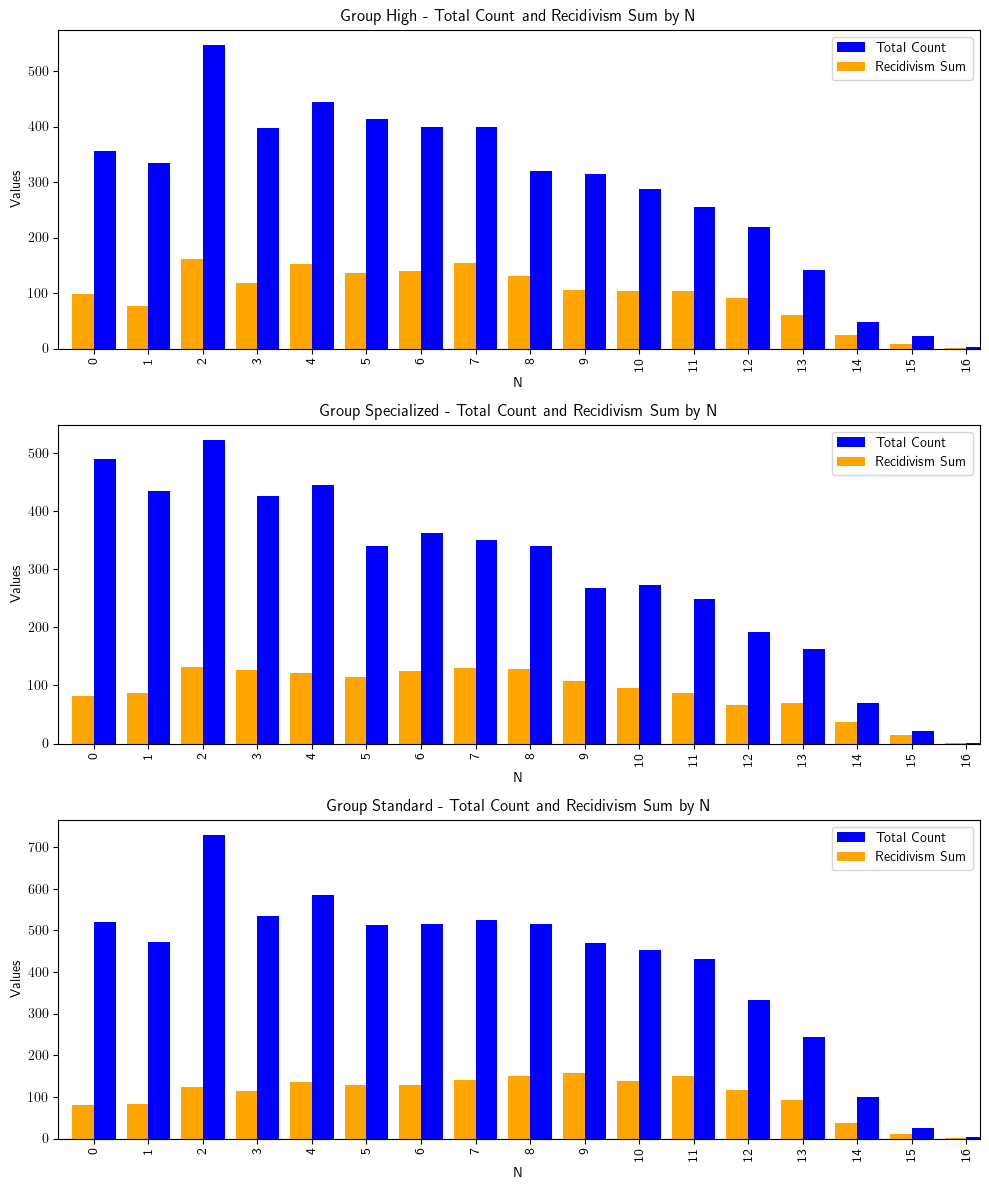

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
grouped_supervision = df.groupby('Supervision_Level_First')

# Determine the number of subplots needed (1 plot per group)
n_groups = len(grouped_supervision)
fig, axes = plt.subplots(n_groups, 1, figsize=(10, 4 * n_groups))

# If only one group, axes might not be a list, so ensure it's iterable
if n_groups == 1:
    axes = [axes]

# Plot total count and sum of Recidivism_Arrest_Year1 in combined subplots
for (name, group), ax in zip(grouped_supervision, axes):
    # Group by 'N' within each group of 'Supervision_Level_First'
    grouped_n = group.groupby('N').agg(
        count=('N', 'size'),
        recidivism_sum=('Recidivism_Arrest_Year1', 'sum')
    )

    # Plot total count of 'N' (bar plot)
    grouped_n['count'].plot(kind='bar', color='blue', ax=ax, position=0, width=0.4, label='Total Count')

    # Plot sum of 'Recidivism_Arrest_Year1' (bar plot on the same subplot)
    grouped_n['recidivism_sum'].plot(kind='bar', color='orange', ax=ax, position=1, width=0.4, label='Recidivism Sum')

    ax.set_title(f'Group {name} - Total Count and Recidivism Sum by N')
    ax.set_xlabel('N')
    ax.set_ylabel('Values')
    ax.legend()

plt.tight_layout()
plt.show()

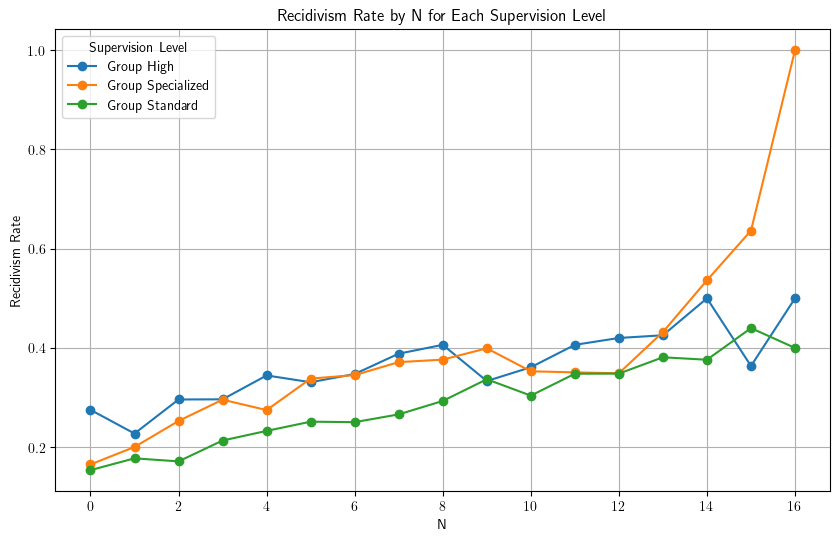

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
grouped_supervision = df.groupby('Supervision_Level_First')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Compute rate and plot it by 'N' for each group
for name, group in grouped_supervision:
    grouped_n = group.groupby('N').agg(
        count=('N', 'size'),
        recidivism_sum=('Recidivism_Arrest_Year1', 'sum')
    )
    
    # Calculate the rate
    grouped_n['rate'] = grouped_n['recidivism_sum'] / grouped_n['count']
    
    # Plot the rate
    plt.plot(grouped_n.index, grouped_n['rate'], marker='o', label=f'Group {name}')

plt.title('Recidivism Rate by N for Each Supervision Level')
plt.xlabel('N')
plt.ylabel('Recidivism Rate')
plt.legend(title='Supervision Level')
plt.grid(True)
plt.show()

/var/folders/vy/2ng6p2qj0zl0rjg687t23gxh0000gn/T/ipykernel_92743/1600493846.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_risk = df.groupby('Risk_Score_Category')


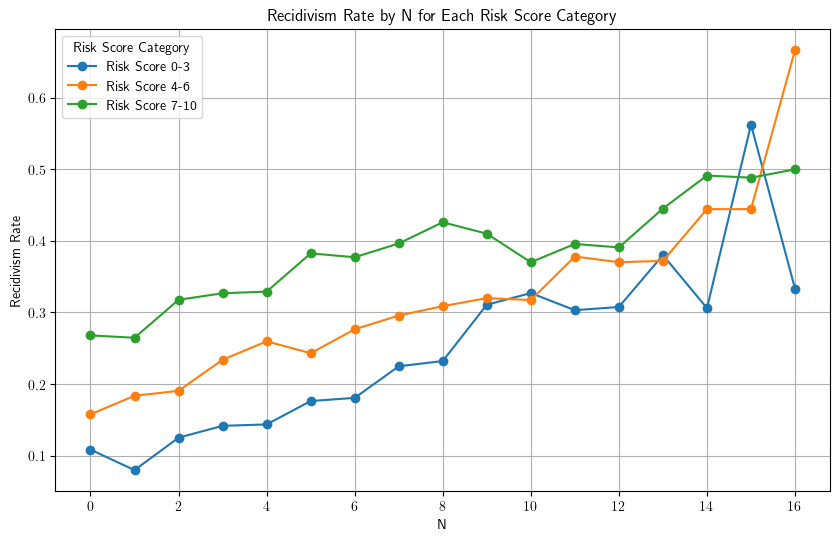

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['Supervision_Risk_Score_First'] = df['Supervision_Risk_Score_First'].fillna(0)

# Bin the scores into categories 0-3, 4-6, 7-10
bins = [0, 3, 6, 10]
labels = ['0-3', '4-6', '7-10']
df['Risk_Score_Category'] = pd.cut(df['Supervision_Risk_Score_First'], bins=bins, labels=labels, right=True, include_lowest=True)

# Group by the new category
grouped_risk = df.groupby('Risk_Score_Category')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Compute rate and plot it by 'N' for each group
for name, group in grouped_risk:
    grouped_n = group.groupby('N').agg(
        count=('N', 'size'),
        recidivism_sum=('Recidivism_Arrest_Year1', 'sum')
    )
    
    # Calculate the rate
    grouped_n['rate'] = grouped_n['recidivism_sum'] / grouped_n['count']
    
    # Plot the rate
    plt.plot(grouped_n.index, grouped_n['rate'], marker='o', label=f'Risk Score {name}')

plt.title('Recidivism Rate by N for Each Risk Score Category')
plt.xlabel('N')
plt.ylabel('Recidivism Rate')
plt.legend(title='Risk Score Category')
plt.grid(True)
plt.show()

## Correlation

In [13]:
import pandas as pd
import numpy as np
import itertools

# Assuming df is your DataFrame

# Get unique N values
unique_N = df['N'].unique()

# Initialize an empty matrix with rows and cols as unique N values
matrix = np.zeros((len(unique_N), len(unique_N)))
# Group by Residence_PUMA
grouped_puma = df.groupby('Residence_PUMA')

# Iterate over each group (each Residence_PUMA)
for name, group in grouped_puma:
    # Get unique N values for the current Residence_PUMA

    n_values_series = group['N']
    n_values = n_values_series.values
    # Increment the count in the matrix for each pair of N values
    for i in n_values:
        for j in n_values:
            matrix[i,j] += 1
            matrix[j,i] += 1
    # break

# Display the matrix
S = matrix

In [17]:
S = S / S.max()
S

array([[5.89982501e-01, 5.13285422e-01, 7.56736338e-01, 5.78437260e-01,
        6.18787491e-01, 5.44718439e-01, 5.44440785e-01, 5.42484293e-01,
        5.32501663e-01, 4.69764769e-01, 4.43329524e-01, 4.11212057e-01,
        3.26689008e-01, 2.31318082e-01, 1.02254163e-01, 2.80624270e-02,
        2.78945431e-03],
       [5.13285422e-01, 4.77048344e-01, 6.82544602e-01, 5.32146524e-01,
        5.65574776e-01, 5.02592514e-01, 5.01791837e-01, 5.05349683e-01,
        4.80735331e-01, 4.29543679e-01, 4.10004585e-01, 3.78758822e-01,
        2.97315796e-01, 2.09163874e-01, 9.32013508e-02, 2.45885232e-02,
        2.67322705e-03],
       [7.56736338e-01, 6.82544602e-01, 1.00000000e+00, 7.65427555e-01,
        8.18595071e-01, 7.23198316e-01, 7.24257276e-01, 7.23882765e-01,
        7.03245969e-01, 6.20621299e-01, 5.91545112e-01, 5.46636189e-01,
        4.32100679e-01, 3.04011778e-01, 1.36231266e-01, 3.60627369e-02,
        3.82258554e-03],
       [5.78437260e-01, 5.32146524e-01, 7.65427555e-01, 6.084

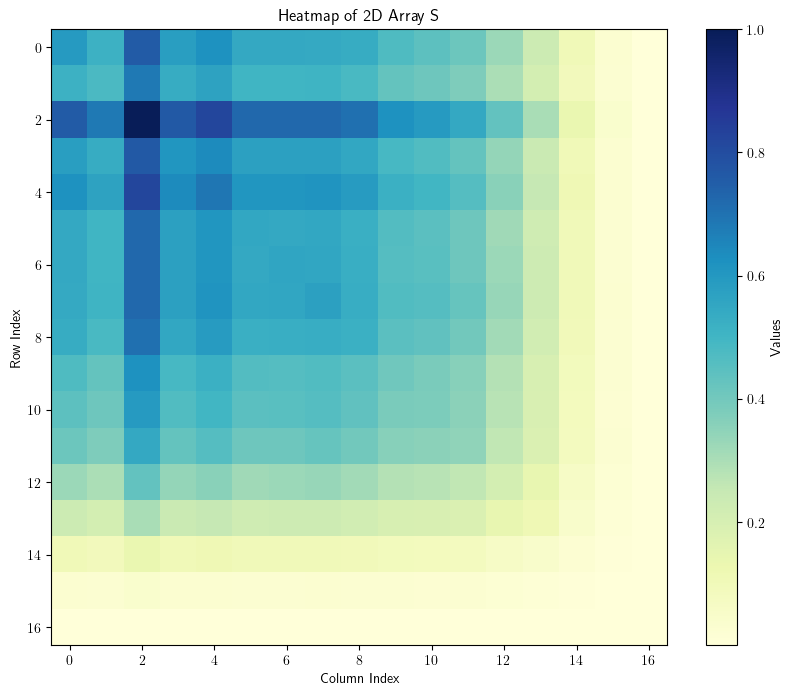

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assume S is your 2D NumPy array

# Plot the 2D NumPy array
plt.figure(figsize=(10, 8))
plt.imshow(S, cmap='YlGnBu', interpolation='nearest')
plt.colorbar(label='Values')

# Adding labels and title
plt.title('Heatmap of 2D Array S')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [16]:
import json

with open("correlation.json", "w") as file:
    json.dump(
        {
            "S": S.tolist(),
            "slots": dfs["N"].tolist(),
            "y1": dfs["Recidivism_Arrest_Year1"].tolist(),
            "pop": dfs["ID"].tolist(),
            "rate1": dfs["ID"].tolist(),
        },
        file,
    )